In [1]:
!pip install mysql-connector-python
import mysql.connector

"pip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [3]:
import getpass
password = getpass.getpass()

In [4]:
connection = mysql.connector.connect(user = 'root', password = password, database = 'ih_gambling', port=3306)

In [5]:
connection.is_connected()

True

In [8]:
if connection.is_connected():
    print("Connection open")
else:
    print("Connection is not successfully open")

Connection open


In [6]:
cursor = connection.cursor()

In [ ]:
query = """SELECT product.product, SUM(Bet_Amt) AS TotalBet
FROM betting
JOIN product
ON betting.classid = product.CLASSID
AND betting.categoryid = product.CATEGORYID
GROUP BY product.product
ORDER BY TotalBet DESC;"""

In [ ]:
cursor.execute(query)

In [ ]:
result = cursor.fetchall()

In [ ]:
result

[('Sportsbook', 570435.1400000001),
 ('Vegas', 288647.6),
 ('Poker', 69393.80400000002),
 ('Casino', 44556.067599999995),
 ('Games', 41805.76000000001),
 ('Bingo', 2903.0),
 ('Adjustments', 295.21)]

In [7]:
import pandas as pd

In [ ]:
products_total = pd.DataFrame(result)
products_total.columns=["Product", "Total"]
products_total

,Product,Total
0,Sportsbook,570435.1400
1,Vegas,288647.6000
2,Poker,69393.8040
3,Casino,44556.0676
4,Games,41805.7600
5,Bingo,2903.0000
6,Adjustments,295.2100


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

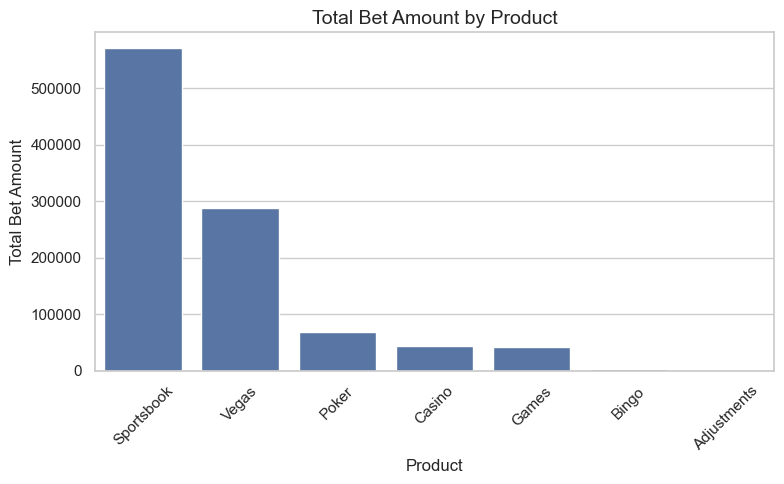

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(8,5))

sns.barplot(
    data=products_total,
    x="Product",
    y="Total"
)

plt.title("Total Bet Amount by Product", fontsize=14)
plt.xlabel("Product")
plt.ylabel("Total Bet Amount")

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
query2 = """SELECT MONTH(STR_TO_DATE(BetDate, "%d/%m/%Y")) AS month, YEAR(STR_TO_DATE(BetDate, "%d/%m/%Y")) AS year, SUM(Bet_Amt) AS TotalBet
FROM betting
GROUP BY MONTH(STR_TO_DATE(BetDate, "%d/%m/%Y")), YEAR(STR_TO_DATE(BetDate, "%d/%m/%Y"))
ORDER BY month, year;"""

In [ ]:
cursor.execute(query2)

In [ ]:
result2 = cursor.fetchall()
result2

[(9, 2012, 124617.27830000005),
 (10, 2012, 291871.7150999999),
 (11, 2012, 395023.49710000004),
 (12, 2012, 206524.0910999999)]

In [ ]:
months_evolution = pd.DataFrame(result2)
months_evolution.columns =["Month", "Year", "Total"]
months_evolution

,Month,Year,Total
0,9,2012,124617.2783
1,10,2012,291871.7151
2,11,2012,395023.4971
3,12,2012,206524.0911


In [ ]:
months_evolution["Month"] = pd.to_datetime(months_evolution["Month"])

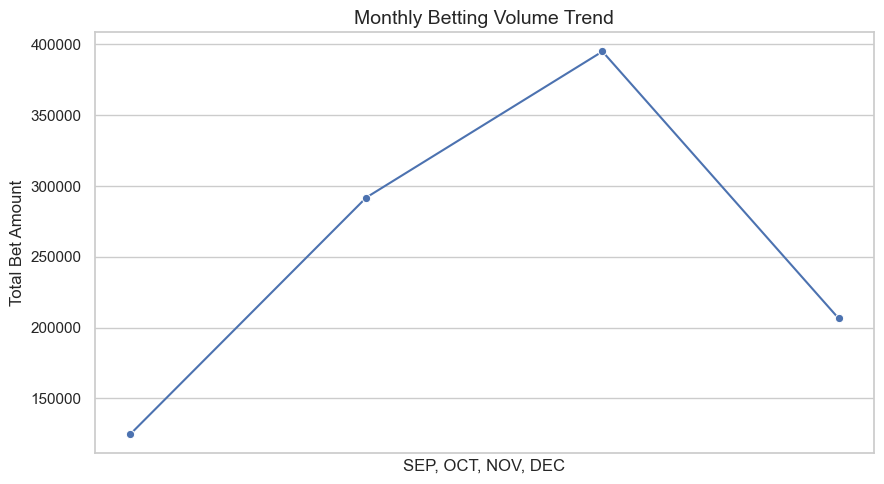

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(9,5))

sns.lineplot(
    data=months_evolution,
    x="Month",
    y="Total",
    marker="o"
)

plt.title("Monthly Betting Volume Trend", fontsize=14)
plt.xlabel("SEP, OCT, NOV, DEC")
plt.ylabel("Total Bet Amount")

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [10]:
query3 = """SELECT customer.CustId, Title, FirstName, LastName, COALESCE(SUM(Bet_Amt),0) AS TotalBet
FROM customer
LEFT JOIN account
ON customer.CustId = account.CustId
LEFT JOIN betting
ON account.AccountNo = betting.AccountNo
AND STR_TO_DATE(BetDate, "%d/%m/%Y")  >= "2012/09/01" AND STR_TO_DATE(BetDate, "%d/%m/%Y") < "2012/10/01"
GROUP BY customer.CustId, customer.Title, customer.FirstName, customer.LastName
ORDER BY TotalBet DESC;"""

In [11]:
cursor.execute(query3)

In [12]:
result3 = cursor.fetchall()
result3

[(1569944, 'Miss', 'Janice', 'Joplin', 72834.44),
 (1191874, 'Mr', 'Jim', 'Morrison', 18880.339999999997),
 (1965214, 'Mr', 'Sidney', 'Vicious', 14627.6883),
 (3042166, 'Mr', 'Keith', 'Moon', 11479.6),
 (889782, 'Mr', 'Bob', 'Marley', 5961.8),
 (2815836, 'Mr', 'Buddy', 'Holly', 403.1),
 (4188499, 'Mr', 'Elvis', 'Presley', 228.31),
 (3531845, 'Mr', 'Bon', 'Scott', 202.0),
 (5694730, 'Mr', 'James', 'Hendrix', 0.0),
 (4704925, 'Mr', 'Marc', 'Bolan', 0.0)]

In [13]:
client_dist = pd.DataFrame(result3)
client_dist.columns = ["CustId", "Title", "FirstName", "LastName", "TotalBet"]
client_dist

,CustId,Title,FirstName,LastName,TotalBet
0,1569944,Miss,Janice,Joplin,72834.4400
1,1191874,Mr,Jim,Morrison,18880.3400
2,1965214,Mr,Sidney,Vicious,14627.6883
3,3042166,Mr,Keith,Moon,11479.6000
4,889782,Mr,Bob,Marley,5961.8000
5,2815836,Mr,Buddy,Holly,403.1000
6,4188499,Mr,Elvis,Presley,228.3100
7,3531845,Mr,Bon,Scott,202.0000
8,5694730,Mr,James,Hendrix,0.0000
9,4704925,Mr,Marc,Bolan,0.0000


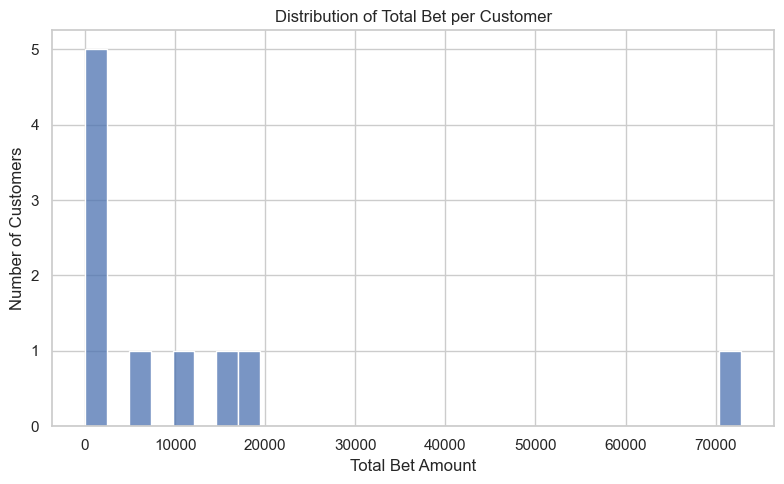

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(8,5))

sns.histplot(client_dist["TotalBet"], bins=30)

plt.title("Distribution of Total Bet per Customer")
plt.xlabel("Total Bet Amount")
plt.ylabel("Number of Customers")

plt.tight_layout()
plt.show()


In [22]:
query4 = """
SELECT CustomerGroup, COUNT(*) AS NumberofCustomers
FROM customer
GROUP BY CustomerGroup;"""

In [23]:
cursor.execute(query4)

In [24]:
result4 = cursor.fetchall()
result4

[('Bronze', 4), ('Gold', 3), ('Silver', 3)]

In [25]:
customergroup = pd.DataFrame(result4)
customergroup.columns = ["CustomerGroup", "Numberofcustomers"]
customergroup

,CustomerGroup,Numberofcustomers
0,Bronze,4
1,Gold,3
2,Silver,3
